In [429]:
import scipy.misc
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

In [430]:
def noise(noise_level, shape):
    return np.random.choice([0, 1], shape, p=[1-noise_level, noise_level])

In [431]:
def noise_masks(noise_levels, shape):
    return [noise(noise_level, shape) for noise_level in noise_levels]

In [432]:
def noisy_images(image_filename, min_noise, max_noise, count):
    image = scipy.misc.imread(image_filename)/255
    noise_levels = np.linspace(min_noise, max_noise, count)
    return [np.logical_xor(image, noise_mask) for noise_mask in noise_masks(noise_levels, np.shape(image))]

In [433]:
def random_images(min_noise, max_noise, count, shape):
    noise_levels = np.linspace(min_noise, max_noise, count)
    return noise_masks(noise_levels, shape)

In [434]:
def flatten(matrix_array):
    return [matrix.flatten() for matrix in matrix_array]

In [435]:
import os 
files = os.listdir('patterns')

In [436]:
count = 100

images = []
for file in files:
    images += noisy_images('patterns/' + file, 0, 0.4, count)
images += random_images(0.1, 0.9, count, np.shape(images[0]))

labels = []
for i in range(len(files) + 1):
    labels += [i] * count

In [437]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flatten(images), labels, test_size=0.2)

In [438]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [439]:
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.98636363636363633

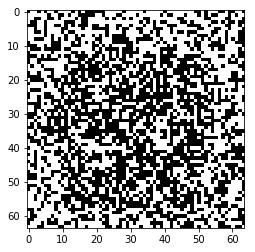

In [446]:
image = scipy.misc.imread('patterns/apple.png')/255
noisy_image = np.logical_xor(image, noise(0.4, np.shape(image)))

plot.imshow(noisy_image, cmap='Greys')

In [447]:
clf.predict([noisy_image.flatten()])

array([3])